In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
data=pd.read_csv("WineQT.csv")

In [5]:
if 'Id' in data.columns:
    data=data.drop(columns='Id')

Purpose:
This heatmap visualizes the Pearson correlation coefficients between each chemical attribute and the target variable quality.
From the heatmap we can identify the top three features that have the greatest impact on wine quality:

Alcohol Correlation: +0.48.  This is a strong positive correlation. Wines with higher alcohol content tend to have higher quality ratings.

Volatile Acidity Correlation: -0.41.  This is a strong negative correlation. Higher volatile acidity (e.g., vinegar taste) usually means lower wine quality.

Sulphates Correlation: +0.26.  This is a moderate positive correlation. Sulphates, which act as preservatives, appear to be linked with better-quality wines.

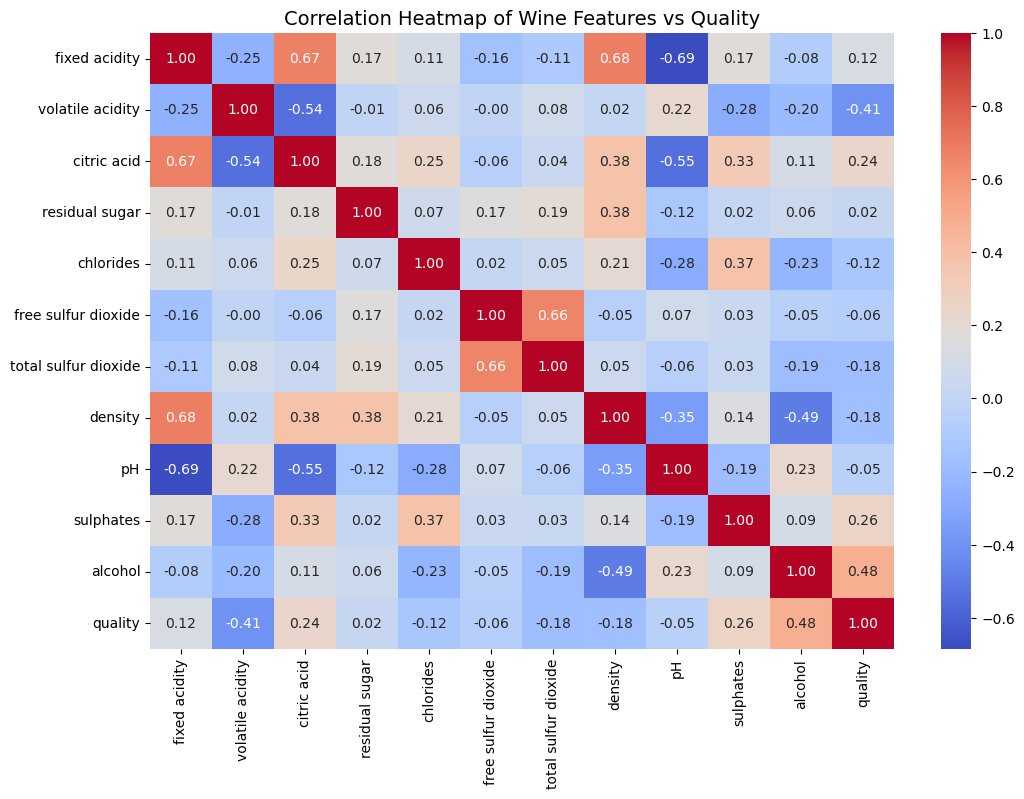

In [7]:
#Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Wine Features vs Quality", fontsize=14)
plt.show()

In [12]:
bar_attributes=['alcohol', 'volatile acidity', 'sulphates', 'residual sugar']
means=data[bar_attributes].mean()

This bar chart shows the average (mean) values of four selected chemical attributes from the wine dataset.

Alcohol has the highest average among the four, which reflects its typical content in wine (around 10–14% ABV).

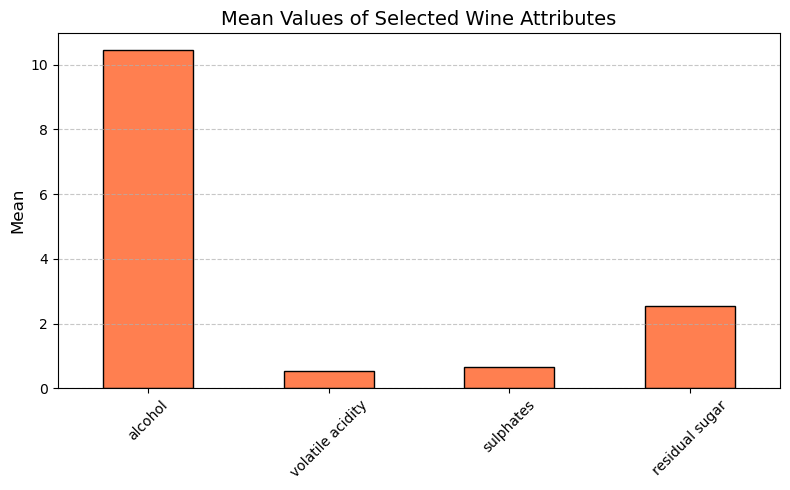

In [14]:
# Plotting
plt.figure(figsize=(8, 5))
means.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Mean Values of Selected Wine Attributes", fontsize=14)
plt.ylabel("Mean", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
#Select the same four attributes
line_attributes=bar_attributes 

In [23]:
#first 100 records
sampled_data=data[line_attributes].head(100)

This line plot visualizes how the selected chemical attributes vary across the first 100 wine samples in the dataset.

Alcohol values are relatively stable but show spikes.  Volatile acidity fluctuates more aggressively.  Sulphates show variability with peaks aligning with certain spikes in alcohol.

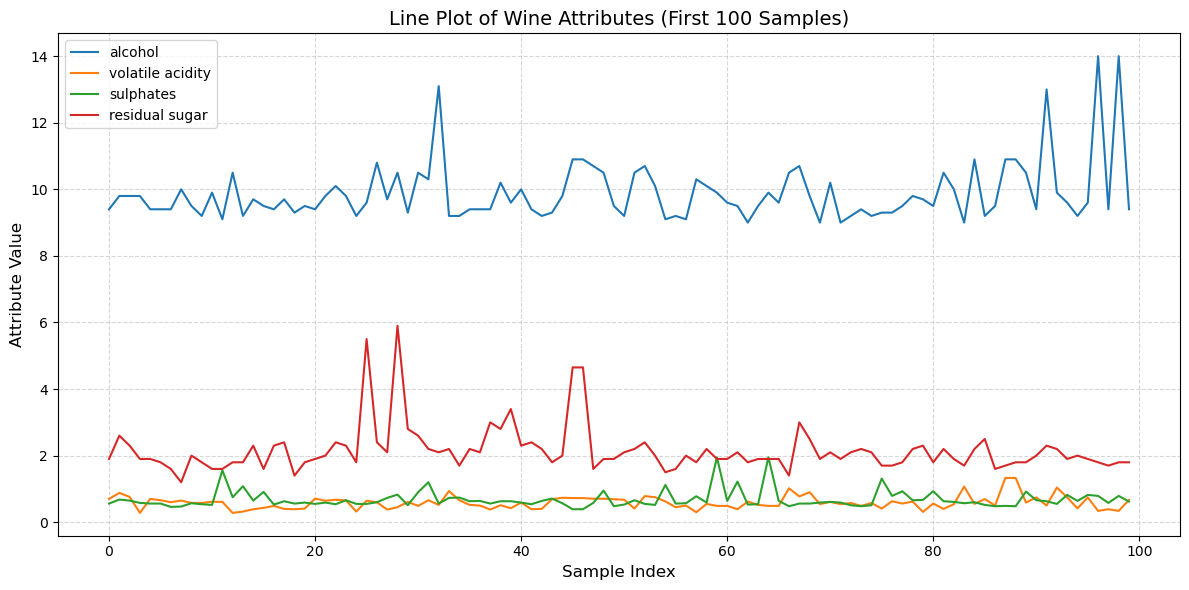

In [27]:
plt.figure(figsize=(12, 6))
for attr in line_attributes:
    plt.plot(sampled_data[attr], label=attr)
plt.title("Line Plot of Wine Attributes (First 100 Samples)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Attribute Value", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

K-Means

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
#Select features for clustering
features=['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']
X=data[features]
#Scale the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [82]:
#Fit KMeans with 4 clusters
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
data['price_category']=kmeans.labels_

This figure shows wines grouped into 4 clusters (price categories) using K-Means clustering, based on key chemical features.
We can see that wines with higher alcohol and lower volatile acidity tend to fall into the same cluster, which often correlates with higher quality or price.

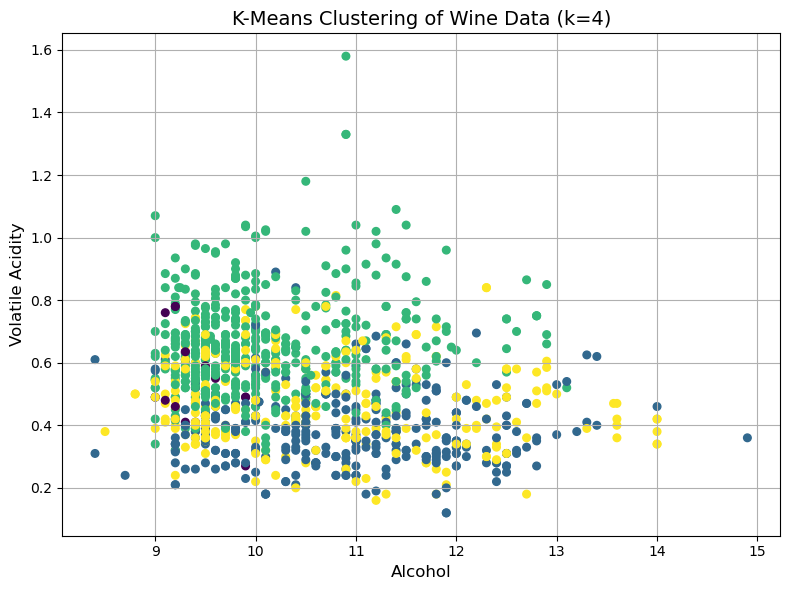

In [52]:
# Scatter plot of clusters based on two features
plt.figure(figsize=(8, 6))
plt.scatter(data['alcohol'], data['volatile acidity'], c=data['price_category'], cmap='viridis', s=30)
plt.title("K-Means Clustering of Wine Data (k=4)", fontsize=14)
plt.xlabel("Alcohol", fontsize=12)
plt.ylabel("Volatile Acidity", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

K-NN

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [58]:
#Select features and target
features=['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']
target='quality'

In [60]:
X=data[features]
y=data[target]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
#Scale features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
k_values=range(1, 21)
accuracies=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracies.append(acc)

This plot shows how the prediction accuracy of K-NN varies with the number of neighbors

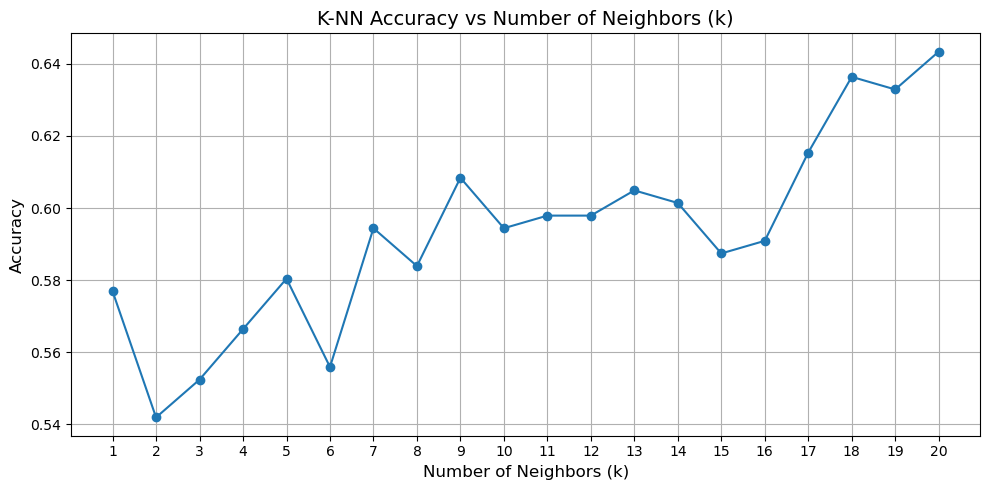

In [73]:
#plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs Number of Neighbors (k)", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

The model performs best when k = 20, achieving the highest accuracy of approximately 64.4%.

In [86]:
#Get best k
best_k=k_values[accuracies.index(max(accuracies))]
#Fit and predict
knn_final=KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
final_preds=knn_final.predict(X_test)
#Final accuracy
final_acc=accuracy_score(y_test, final_preds)
print(f"Best k: {best_k}")
print(f"Test Accuracy: {final_acc:.2f}")

Best k: 20
Test Accuracy: 0.64
